In [1]:
pip install catboost shap -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
df = pd.read_csv('base_dt.csv')
df.head(3)

,car_id,model,car_type,fuel_type,car_rating,riders,target_reg,target_class,total_car_age,servis_car_age,...,max_car_speed,count_car_rides,upquart_car_speed,start_car_devnorm,driver_range,active_ride,accident_rate,worker_experience,work_meanduration_car,month_top_carfix
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,76163,108.53,another_bug,8,2,...,180.855726,169.0,105.000000,0.000,1097.0,0.729018,0.007975,275.685714,26.657143,4.0
1,O41613818T,VW Polo VI,economy,petrol,3.90,78218,35.20,electro_bug,8,2,...,187.862734,174.0,109.660112,-7.057,1187.5,0.694342,0.006158,264.628571,24.942857,1.0
2,d-2109686j,Renault Sandero,standart,petrol,6.30,23340,38.62,gear_stick,11,6,...,102.382857,165.0,74.000000,0.000,1206.0,0.758170,0.007472,268.314286,26.142857,3.0


In [3]:
df.drop(columns=['car_id'], inplace=True, errors = 'ignore')

In [4]:
pd.set_option('display.max_info_columns', 30)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model                  2337 non-null   object 
 1   car_type               2337 non-null   object 
 2   fuel_type              2337 non-null   object 
 3   car_rating             2337 non-null   float64
 4   riders                 2337 non-null   int64  
 5   target_reg             2337 non-null   float64
 6   target_class           2337 non-null   object 
 7   total_car_age          2337 non-null   int64  
 8   servis_car_age         2337 non-null   int64  
 9   shift_car_devnorm      2337 non-null   float64
 10  min_car_rating         2337 non-null   float64
 11  mean_car_rating        2337 non-null   float64
 12  sum_car_distance       2337 non-null   float64
 13  max_car_speed          2337 non-null   float64
 14  count_car_rides        2337 non-null   float64
 15  upqu

In [4]:
df['month_top_carfix'] = df['month_top_carfix'].astype(str) # Представляет собой нумерацию месяцев от 1 до 12, что является категориальным признаком

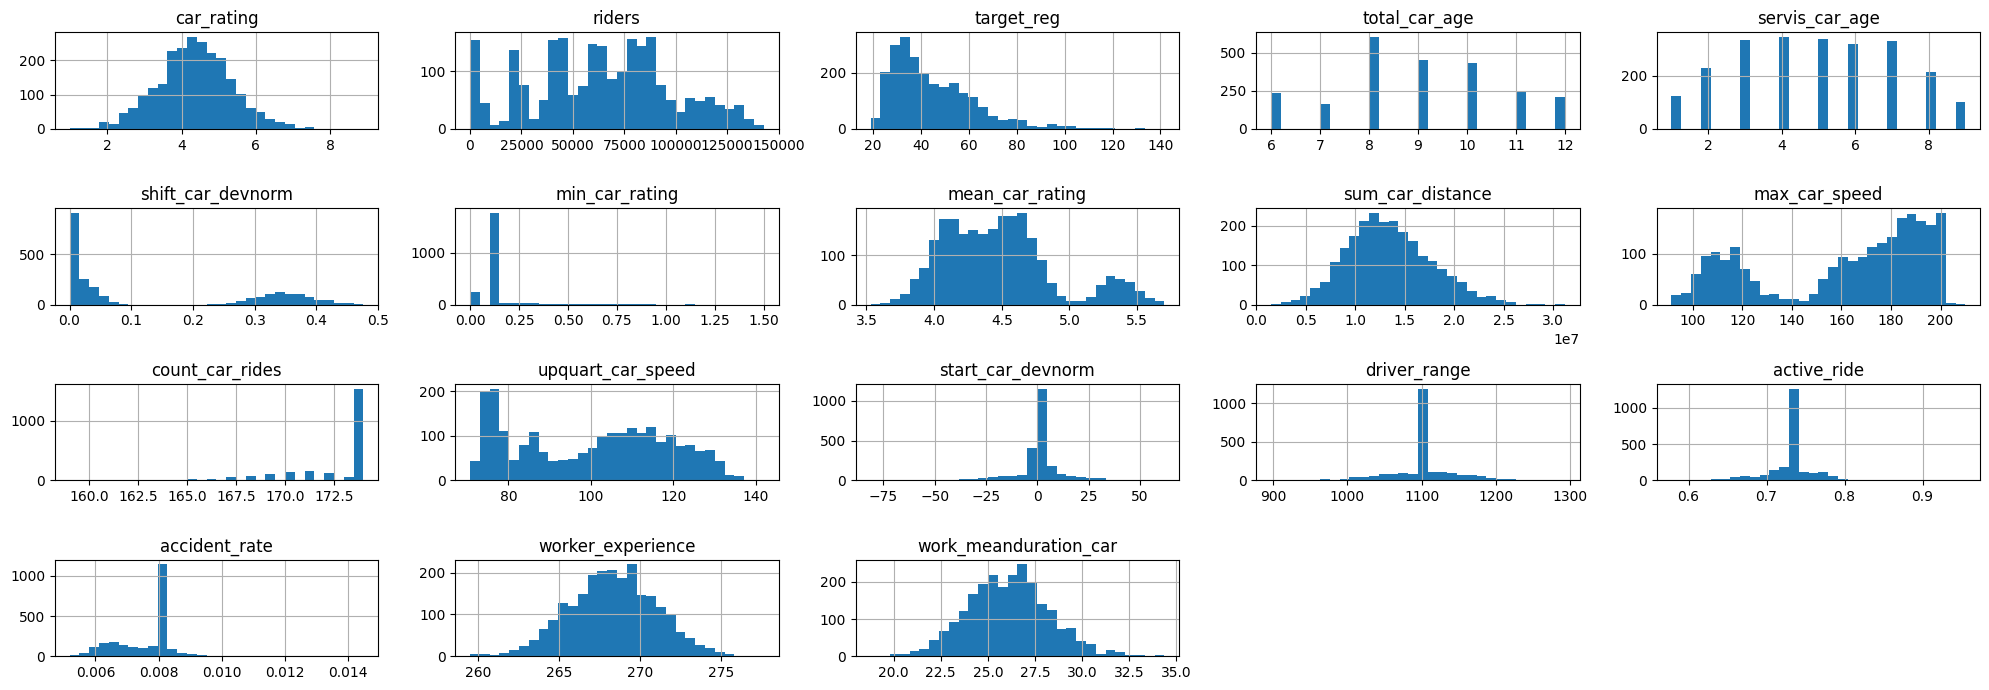

In [24]:
df.hist(figsize = (20, 7), layout = (-1, 5), bins=30);
plt.tight_layout()

In [7]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [8]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

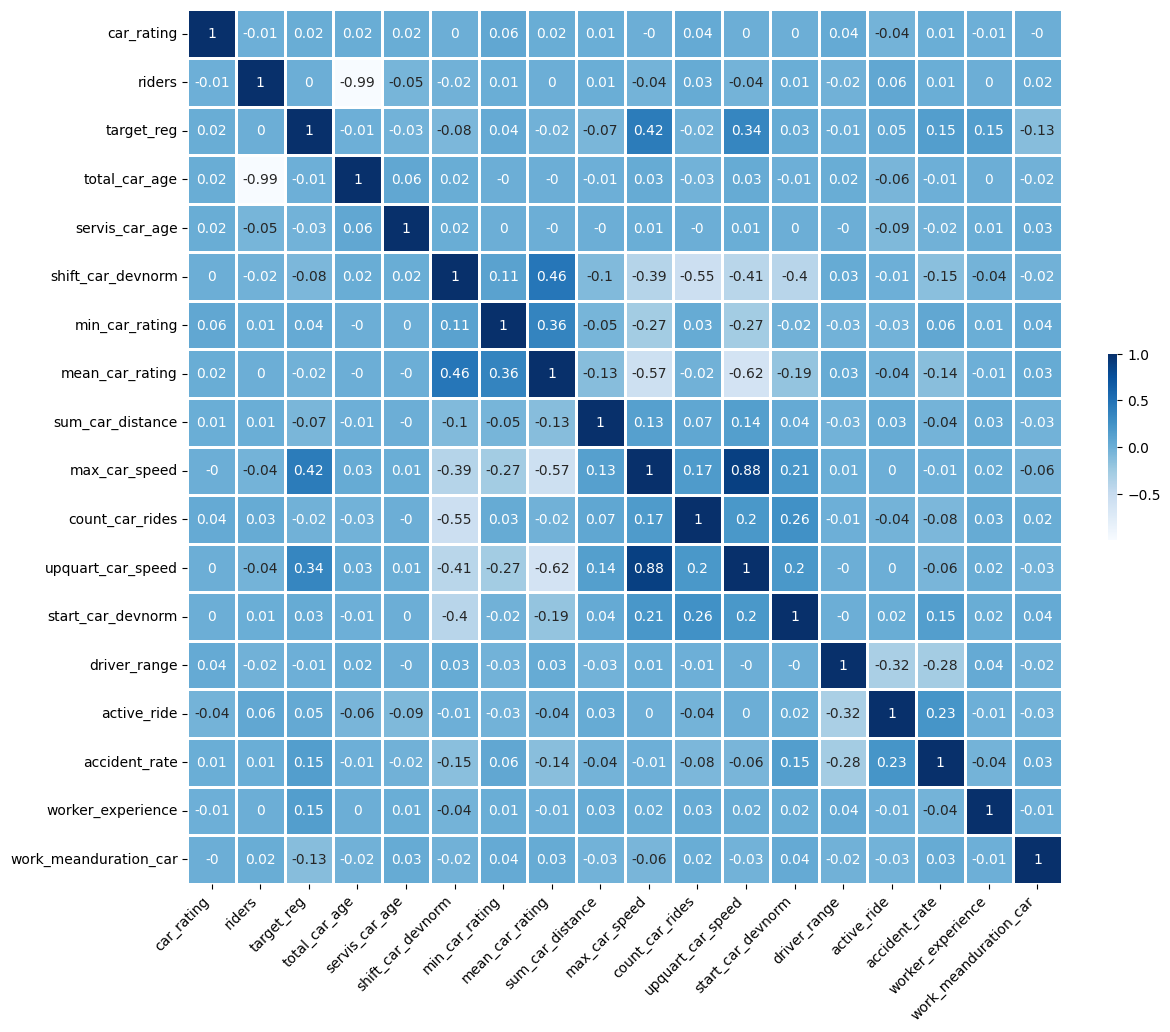

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 12)

heatmap = sns.heatmap(
    df.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    
    cmap="Blues",  # Использовать синюю цветовую карту
    cbar_kws={"fraction": 0.01},  # Боковой колор-бар (shrink colour bar)
    linewidth=2,  # Пространство между клетками
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
);

##### Отмечу, что max_car_speed и upquart_car_speed имеют сильную корреляцию 0.88, при этом с target_reg max_car_speed=0.42, а upquart_car_speed=0.34, что предпочтительней использовать max_car_speed. Также mean_car_rating и shift_car_devnorm коррелируют 0.46, а с таргетом mean_car_rating=0.04, shift_car_devnorm=-0.08, что не дает явного преимущества

interval columns not set, guessing: ['car_rating', 'riders', 'target_reg', 'total_car_age', 'servis_car_age', 'shift_car_devnorm', 'min_car_rating', 'mean_car_rating', 'sum_car_distance', 'max_car_speed', 'count_car_rides', 'upquart_car_speed', 'start_car_devnorm', 'driver_range', 'active_ride', 'accident_rate', 'worker_experience', 'work_meanduration_car']


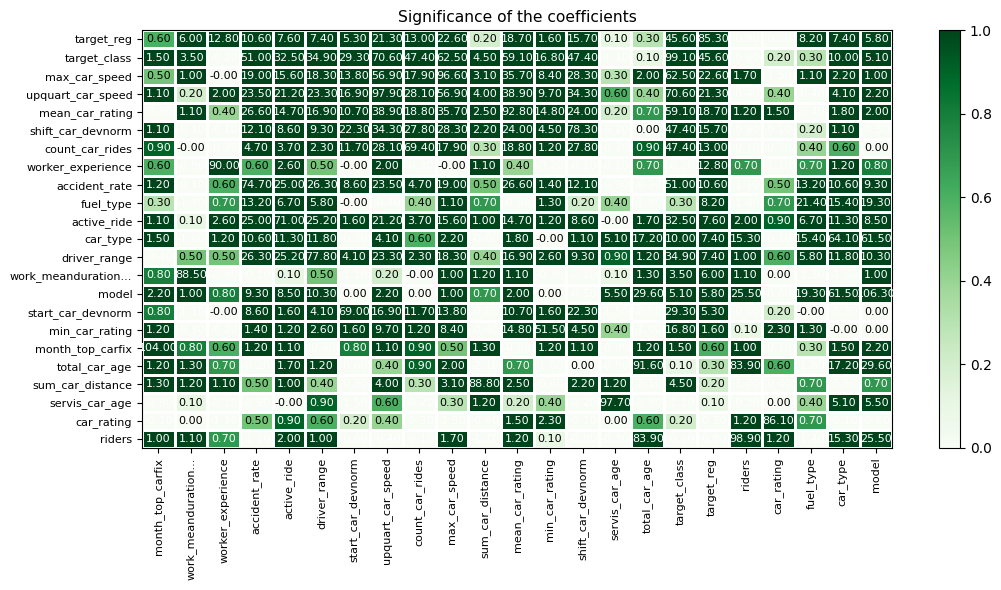

In [44]:
significance_overview = df.significance_matrix().fillna(0).round(1).sort_values('target_reg')

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [45]:
# Фильтрация значений для строки 'target_reg'
target_reg_values = significance_overview.loc['target_reg']


# Создание масок для условий
mask_group_1 = (target_reg_values >= 3.84) & (target_reg_values <= 6.63)
mask_group_2 = target_reg_values > 6.63

# Создание пустых списков для групп
group_1 = []
group_2 = []

# Заполнение групп на основе условий
for column in target_reg_values.index:
    if mask_group_2[column]:
        group_2.append(column)
    elif mask_group_1[column]:
        group_1.append(column)

print("Group 1:", group_1)
print("Group 2:", group_2)

Group 1: ['model', 'start_car_devnorm', 'work_meanduration_car']
Group 2: ['car_type', 'fuel_type', 'target_reg', 'target_class', 'shift_car_devnorm', 'mean_car_rating', 'max_car_speed', 'count_car_rides', 'upquart_car_speed', 'driver_range', 'active_ride', 'accident_rate', 'worker_experience']


##### Группа 1 - вероятность 95%, что данные не случайны, Группа 2 - 99%

In [5]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

In [6]:
drop_cols = ['target_class', 'target_reg']
cat_cols = ['car_type', 'fuel_type', 'model', 'month_top_carfix']

X = df.drop(drop_cols, axis=1, errors = 'ignore')
y = df['target_class'].fillna(0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1)
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.7297205	test: 1.7267619	best: 1.7267619 (0)	total: 101ms	remaining: 1m 41s


100:	learn: 0.0964897	test: 0.1295165	best: 0.1294841 (99)	total: 6.37s	remaining: 56.7s
200:	learn: 0.0567358	test: 0.1082516	best: 0.1082378 (199)	total: 12.7s	remaining: 50.3s
300:	learn: 0.0380468	test: 0.1019380	best: 0.1017947 (299)	total: 18.9s	remaining: 44s
400:	learn: 0.0281001	test: 0.1000981	best: 0.0998096 (390)	total: 25.2s	remaining: 37.7s
500:	learn: 0.0219133	test: 0.0991053	best: 0.0985681 (477)	total: 31.4s	remaining: 31.3s
600:	learn: 0.0175453	test: 0.0975568	best: 0.0974989 (598)	total: 37.6s	remaining: 24.9s
700:	learn: 0.0148012	test: 0.0991127	best: 0.0973811 (609)	total: 43.7s	remaining: 18.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.09738106392
bestIteration = 609

Shrink model to first 610 iterations.


In [9]:
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,accident_rate,21.307536
1,count_car_rides,20.399171
2,max_car_speed,16.276186
3,upquart_car_speed,13.040875
4,mean_car_rating,6.836047
5,shift_car_devnorm,6.442116
6,start_car_devnorm,3.048733
7,driver_range,2.193735
8,month_top_carfix,2.170263
9,car_type,1.851363


In [10]:
top_features_catboost = fi['Feature Id'][:10].tolist()
top_features_catboost

['accident_rate',
 'count_car_rides',
 'max_car_speed',
 'upquart_car_speed',
 'mean_car_rating',
 'shift_car_devnorm',
 'start_car_devnorm',
 'driver_range',
 'month_top_carfix',
 'car_type']

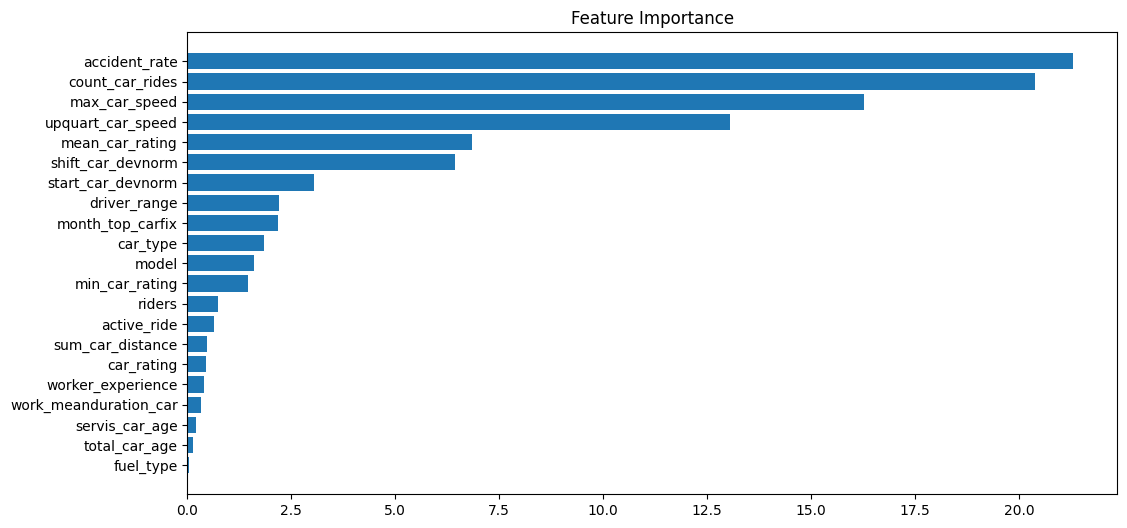

In [25]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

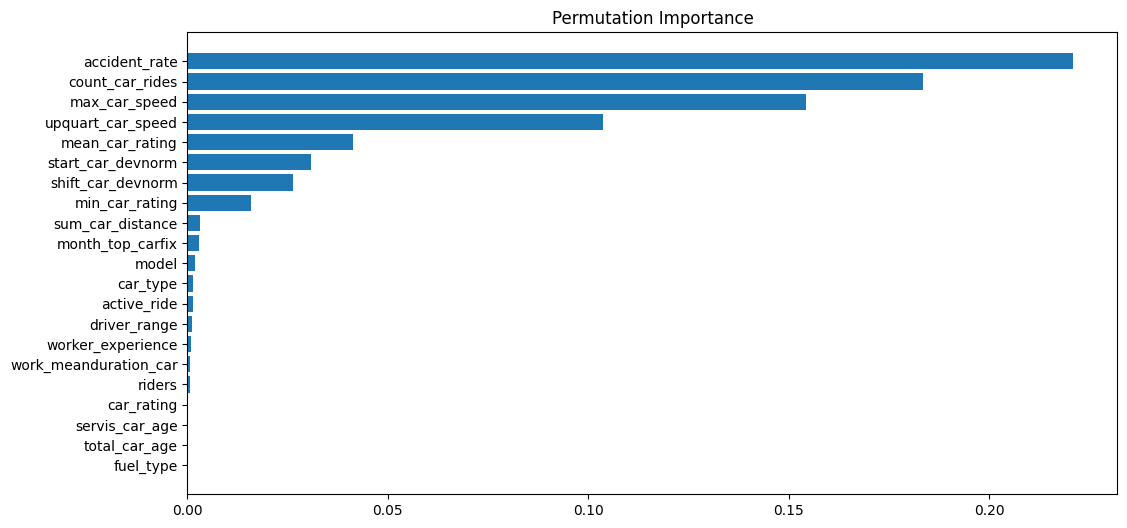

In [11]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [12]:
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
top_features_permimp = X_test.columns[sorted_idx][:10].tolist()
top_features_permimp

['accident_rate',
 'count_car_rides',
 'max_car_speed',
 'upquart_car_speed',
 'mean_car_rating',
 'start_car_devnorm',
 'shift_car_devnorm',
 'min_car_rating',
 'sum_car_distance',
 'month_top_carfix']

In [13]:
summary = model.select_features(X_train, y_train, 
                      eval_set=(X_test, y_test),
                      features_for_select='0-13',
                      num_features_to_select=8,
                      steps=1,
                      train_final_model=False,
                      logging_level='Silent')

In [14]:
# Cписок отобранных фичей (не отранжирован по важности)
print(summary['selected_features_names'])
# И на лучшее значение лосса
print(f"Best loss: {summary['loss_graph']['loss_values'][-1]}")

['car_type', 'shift_car_devnorm', 'min_car_rating', 'mean_car_rating', 'sum_car_distance', 'max_car_speed', 'count_car_rides', 'upquart_car_speed']
Best loss: 0.08976192939930472


## Проверим качество без лишних признаков:

In [15]:
important_features_best8 = ['car_type', 'shift_car_devnorm', 'min_car_rating', 'mean_car_rating', 'sum_car_distance', 'max_car_speed', 'count_car_rides', 'upquart_car_speed']
important_features_Group2 = ['car_type', 'fuel_type', 'target_reg', 'target_class', 'shift_car_devnorm', 'mean_car_rating', 'max_car_speed', 'count_car_rides', 'upquart_car_speed', 'driver_range', 'active_ride', 'accident_rate', 'worker_experience']
# top_features_catboost
# top_features_permimp


In [22]:
from heapq import nlargest

all_lists = important_features_best8 + important_features_Group2 + top_features_catboost + top_features_permimp
top_8 = nlargest(8, set(all_lists), key=all_lists.count)
top_8 # список 8 признаков отобранных из топ признаков 

['max_car_speed',
 'mean_car_rating',
 'shift_car_devnorm',
 'count_car_rides',
 'upquart_car_speed',
 'accident_rate',
 'car_type',
 'start_car_devnorm']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_cols = ['car_type']

model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1)


model.fit(X_train[top_8], y_train, 
          eval_set=(X_test[top_8], y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.6764891	test: 1.6865688	best: 1.6865688 (0)	total: 20.3ms	remaining: 20.3s


100:	learn: 0.0972404	test: 0.1410023	best: 0.1410023 (100)	total: 1.91s	remaining: 17s
200:	learn: 0.0600886	test: 0.1249737	best: 0.1249737 (200)	total: 4.14s	remaining: 16.5s
300:	learn: 0.0437421	test: 0.1209985	best: 0.1209985 (300)	total: 6.27s	remaining: 14.6s
400:	learn: 0.0337787	test: 0.1201941	best: 0.1200390 (394)	total: 8.34s	remaining: 12.5s
500:	learn: 0.0268859	test: 0.1217810	best: 0.1197418 (412)	total: 10.4s	remaining: 10.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1197418274
bestIteration = 412

Shrink model to first 413 iterations.


##### top_8 с результатом bestTest = 0.1197418274, в то время как модель со всеми(20 признаками) bestTest = 0.09738106392

In [24]:
# так как  max_car_speed и upquart_car_speed сильно коррелируют, то для эксперимента удалю upquart_car_speed из списка
top_8_rem_upspeed = [feature for feature in top_8 if feature != 'upquart_car_speed']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_cols = ['car_type']

model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1)


model.fit(X_train[top_8_rem_upspeed], y_train, 
          eval_set=(X_test[top_8_rem_upspeed], y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.7058030	test: 1.7081981	best: 1.7081981 (0)	total: 21.3ms	remaining: 21.3s
100:	learn: 0.1055640	test: 0.1638630	best: 0.1638630 (100)	total: 1.84s	remaining: 16.4s
200:	learn: 0.0646501	test: 0.1544488	best: 0.1540451 (195)	total: 3.93s	remaining: 15.6s
300:	learn: 0.0468123	test: 0.1555751	best: 0.1521330 (250)	total: 5.96s	remaining: 13.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.15213295
bestIteration = 250

Shrink model to first 251 iterations.


##### top_8_rem_upspeed с результатом bestTest = 0.15213295 в сравнении top_8 = 0.1197418274 удаление признака upquart_car_speed снизило точность, в то время как модель со всеми(20 признаками) bestTest = 0.09738106392 лидирует

In [37]:
# Тест на top_features_catboost8

top_features_catboost8 = top_features_catboost[:8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_cols = ['car_type']

model = CatBoostClassifier(random_state=42,
                          # cat_features=cat_cols,
                           thread_count=-1)


model.fit(X_train[top_features_catboost8], y_train, 
          eval_set=(X_test[top_features_catboost8], y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.7035742	test: 1.7158818	best: 1.7158818 (0)	total: 11.3ms	remaining: 11.2s


100:	learn: 0.0778132	test: 0.1293426	best: 0.1293426 (100)	total: 753ms	remaining: 6.71s
200:	learn: 0.0454010	test: 0.1183483	best: 0.1183449 (198)	total: 1.64s	remaining: 6.53s
300:	learn: 0.0309687	test: 0.1173101	best: 0.1162836 (267)	total: 2.43s	remaining: 5.64s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.116283578
bestIteration = 267

Shrink model to first 268 iterations.


##### top_features_catboost8 bestTest = 0.116283578 против модель со всеми(21 признаками) bestTest = 0.09738106392

In [11]:
custom_top10 = ['model',
 'car_type',
  'car_rating',
 'min_car_rating',
 'count_car_rides',
 'upquart_car_speed',
 'start_car_devnorm',
 'driver_range',
 'month_top_carfix',
 'accident_rate']

In [12]:
# Тест на custom_top10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_cols = ['car_type', 'model', 'month_top_carfix']

model = CatBoostClassifier(random_state=42,
                          cat_features=cat_cols,
                           thread_count=-1)


model.fit(X_train[custom_top10], y_train, 
          eval_set=(X_test[custom_top10], y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.6785597	test: 1.6822162	best: 1.6822162 (0)	total: 92.2ms	remaining: 1m 32s
100:	learn: 0.1846012	test: 0.2241668	best: 0.2241668 (100)	total: 4.87s	remaining: 43.4s
200:	learn: 0.1302917	test: 0.2080684	best: 0.2077987 (198)	total: 9.74s	remaining: 38.7s
300:	learn: 0.0994089	test: 0.2066607	best: 0.2059908 (285)	total: 14.6s	remaining: 33.8s
400:	learn: 0.0737265	test: 0.2036504	best: 0.2036504 (400)	total: 19.4s	remaining: 28.9s
500:	learn: 0.0576357	test: 0.2053663	best: 0.2026709 (442)	total: 24.1s	remaining: 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2026708708
bestIteration = 442

Shrink model to first 443 iterations.


#### стало еще хуже bestTest = 0.2026708708, мое субьективное мнение не сработало

In [14]:
# Тест на important_features_best8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_cols = ['car_type']

model = CatBoostClassifier(random_state=42,
                          cat_features=cat_cols,
                           thread_count=-1)


model.fit(X_train[important_features_best8], y_train, 
          eval_set=(X_test[important_features_best8], y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.109335
0:	learn: 1.7598628	test: 1.7651787	best: 1.7651787 (0)	total: 34.4ms	remaining: 34.4s
100:	learn: 0.2277758	test: 0.2907326	best: 0.2899475 (95)	total: 1.93s	remaining: 17.2s
200:	learn: 0.1609001	test: 0.2738740	best: 0.2737705 (199)	total: 4.07s	remaining: 16.2s
300:	learn: 0.1256277	test: 0.2745822	best: 0.2732847 (209)	total: 6.25s	remaining: 14.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2732846916
bestIteration = 209

Shrink model to first 210 iterations.


##### нет предела совершенства bestTest = 0.2732846916! лучший вариант модель со всеми(21 признаками) bestTest = 0.09738106392. Могу предположить, что уже на этапе формироания признаков я сфокусировался на получении только полезных признаков, которые могли быть факторами для поломки автомобиля, поэтому ансамбль полученных признаков(21) имеет максимальный эффект